# 02 - Buildings by block

In [1]:
import sys
sys.path.append('..')

from osmuf.core import *

In [2]:
# dictionary of places of interest for convenience, 
places = {'posadas' : (-27.37577,-55.90059),
          'kaduna' : (10.53364, 7.37360),
          'buenos_aires' : (-34.5798,-58.4422), #57897,44013
          'margery_street' : (51.5266,-0.1109),
          'welwyn_garden_city': (51.7938,-0.18645)}

In [3]:
place='margery_street'
point=places[place]
distance=500 # in meters

In [4]:
city_blocks, city_blocks_gross, city_blocks_gross_raw = city_blocks_from_point(point, distance)

In [5]:
buildings = buildings_from_city_blocks(city_blocks)

## Buildings coloured by block_id

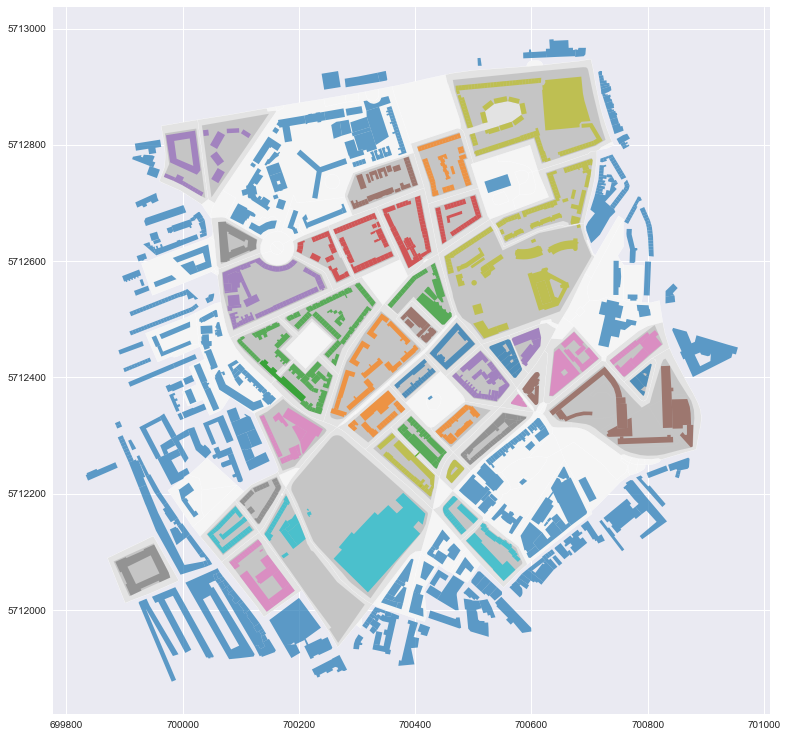

In [6]:
ax = city_blocks_gross_raw.plot(color='whitesmoke', edgecolor='white', figsize=(16,13));

city_blocks_gross.plot(ax=ax, color='lightgray',edgecolor='white', alpha=0.5);

city_blocks.plot(ax=ax, color='darkgray', alpha=0.5);

# show the buildings coloured by block
buildings.plot(ax=ax, column='block_id', cmap=None, categorical=True, legend=False,alpha=0.7);

## Buildings coloured by storeys above ground

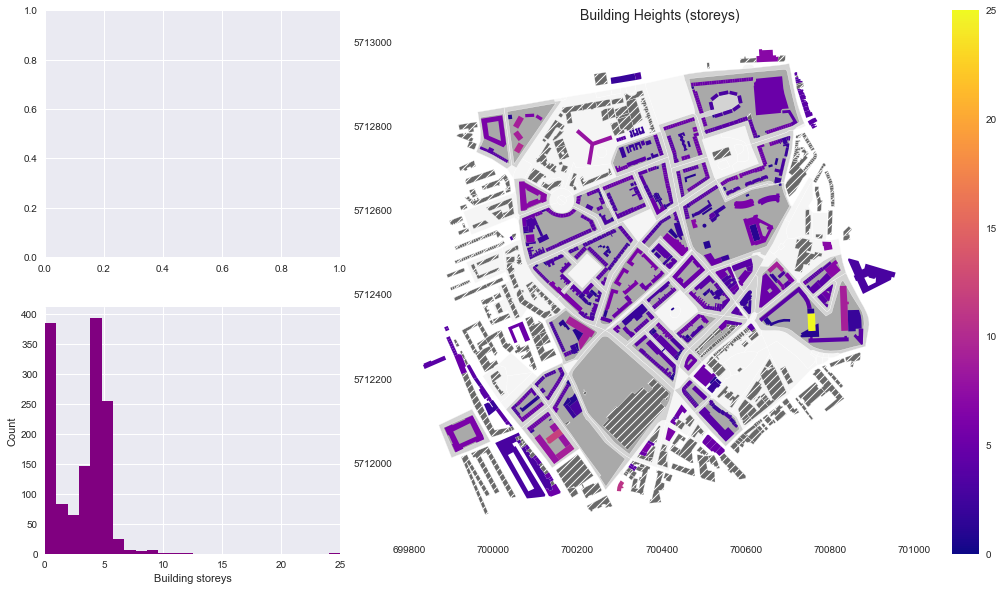

In [9]:
fig, ax = plot_buildings(city_blocks_gross_raw, city_blocks_gross, city_blocks, buildings)
fig.savefig('../local_images/03_building_heights_{}.png'.format(place), transparent=False, dpi=200, bbox_inches="tight")